In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
myURL = "https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/heart2.csv"
df = pd.read_csv(myURL)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
"""
Checking whether there is missing data or not, 
if not then it can proceed to the Exploratory Data Analysis (EDA) stage.
"""
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

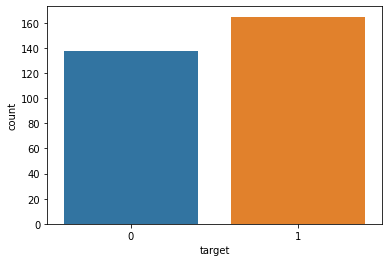

In [4]:
# Conducting Exploratory Data Analysis (EDA) to understand our data better
sns.countplot(df['target'])

    Looks like the target feature is balanced because the number of values 0 and 1 does not differ much.
    Value 0 for Heart Disease.
    Value 1 for No Heart Disease.

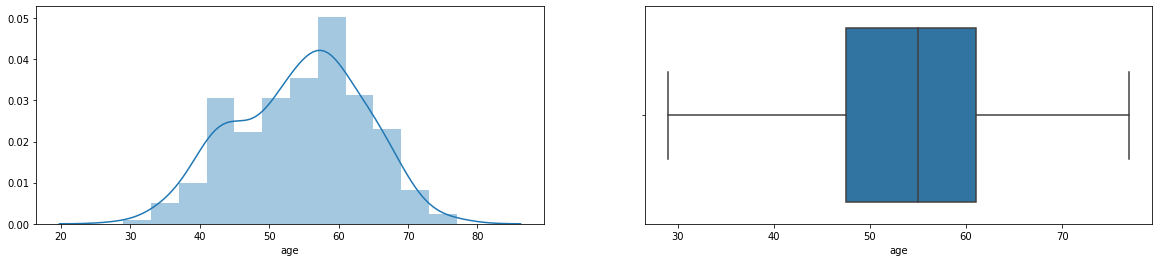

In [5]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['age'])

f.add_subplot(1,2,2)
sns.boxplot(df['age'])


    From the distplot, it can be seen that the density of the data lies in the range of 50–60 years and very rarely patients aged 30 years or below or 80 years and above.
    The boxplot shows that the data has no outliers.

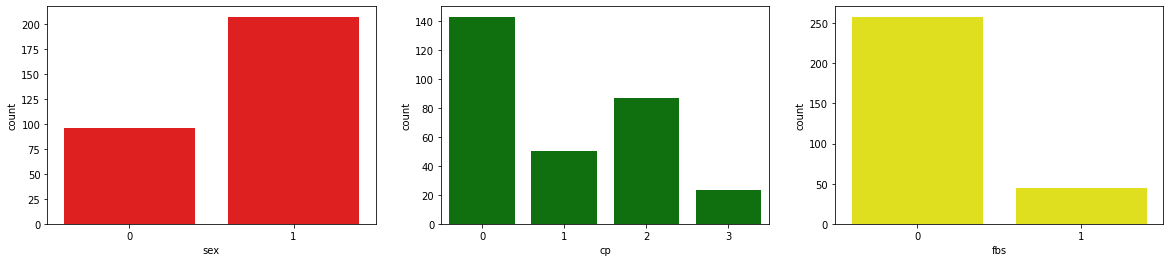

In [6]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

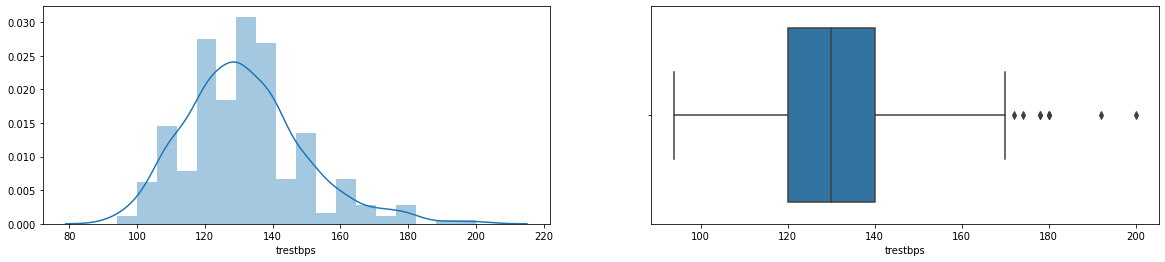

In [7]:
"""
    Male patients turns out to have more numbers or even 2 times the number of female patients.
    Most patients have type CP 0, which is typical angine and the least type is 3, which is asymptomatic.
    The plot above shows that there are many fasting blood sugar values below 120 or 0.
"""
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['trestbps'])

f.add_subplot(1,2,2)
sns.boxplot(df['trestbps'])

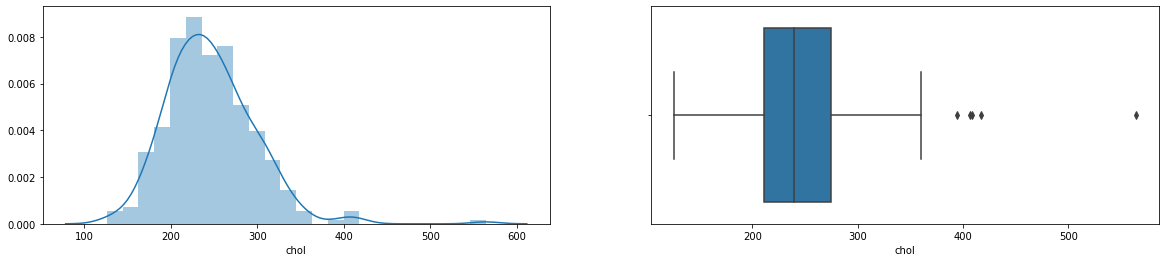

In [8]:
"""
    For the value of resting blood pressure or trestbps, the most numbers are ranged from 120 to 140 mmHg.
    The trestbps feature has several outliers.
"""

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['chol'])

f.add_subplot(1,2,2)
sns.boxplot(df['chol'])

In [9]:
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [10]:
#Create KNN Object.
knn = KNeighborsClassifier()

#Create x and y variables.
x = df.drop(columns=['target'])
y = df['target']

#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Training the model.
knn.fit(x_train, y_train)

#Predict test data set.
y_pred = knn.predict(x_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61

0.5655555555555556


    From the classification report, it can be seen that the model has an average performance of around 57% ranging from precision, recall, f1-score, and support. Accuracy also shows in value of 57%.
    Then for the AUC score, it can be seen that the value is around 56.5%.

In [ ]:
"""
Because the performance is still low, 
Let's try to use Hyperparameter Tuning to Improve Model Performance.
"""

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model

best_model = clf.fit(x,y)

In [ ]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

    From GridSearch, it can be seen that the best number of leaf_size is 5 while the optimal distance method is Manhattan or p = 1.
    Then the most optimal number of K is 7.
    Using Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices.
    The ROC value also increased to 76%.

In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc_score(y_test, y_pred)